In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:

# For time stamps
from datetime import datetime



In [3]:
# For division
from __future__ import division

In [4]:
end = datetime.now()
start = datetime(end.year -1 , end.month ,end.day)

In [5]:
from nsepy import get_history


In [6]:
sbi = get_history(symbol="SBIN", start = start , end = end )
infosys = get_history(symbol="INFY", start = start , end = end )
pnb = get_history(symbol="PNB", start = start , end = end )
itc = get_history(symbol="ITC", start = start , end = end )


In [7]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2018-04-02 to 2019-04-02
Data columns (total 14 columns):
Symbol                250 non-null object
Series                250 non-null object
Prev Close            250 non-null float64
Open                  250 non-null float64
High                  250 non-null float64
Low                   250 non-null float64
Last                  250 non-null float64
Close                 250 non-null float64
VWAP                  250 non-null float64
Volume                250 non-null int64
Turnover              250 non-null float64
Trades                250 non-null int64
Deliverable Volume    250 non-null int64
%Deliverble           250 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.3+ KB


In [8]:
sbi.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-04-02,SBIN,EQ,249.90,251.80,252.00,244.90,246.00,246.15,247.21,14993188,3.706522e+14,107701,2746163,0.1832
2018-04-03,SBIN,EQ,246.15,249.55,252.80,248.25,250.95,250.50,250.35,19883309,4.977777e+14,113047,3126786,0.1573
2018-04-04,SBIN,EQ,250.50,251.70,253.00,245.50,246.70,247.30,249.33,18824449,4.693472e+14,109181,5025914,0.2670
2018-04-05,SBIN,EQ,247.30,252.60,261.90,250.00,260.80,259.30,255.00,22880821,5.834536e+14,154532,6073885,0.2655
2018-04-06,SBIN,EQ,259.30,259.65,261.45,254.85,258.75,259.70,258.38,24868860,6.425623e+14,187342,5294380,0.2129


In [9]:
sbi.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,250.000000,250.000000,250.000000,250.0000,250.000000,250.000000,250.000000,2.500000e+02,2.500000e+02,250.000000,2.500000e+02,250.000000
mean,276.861400,277.365200,281.065200,273.6354,277.189400,277.177800,277.353600,2.157879e+07,6.028779e+14,138198.796000,6.509261e+06,0.295893
std,19.331014,19.419468,19.802159,19.2928,19.555131,19.534218,19.434342,1.189279e+07,3.529718e+14,60782.004938,3.961934e+06,0.084787
min,233.200000,233.250000,238.800000,232.5000,233.250000,233.200000,234.730000,3.312160e+06,9.496387e+13,31229.000000,6.905790e+05,0.123700
25%,262.787500,262.237500,267.387500,259.5750,262.750000,262.912500,263.500000,1.461157e+07,3.861946e+14,100748.250000,3.636738e+06,0.239625
50%,277.700000,277.150000,282.650000,274.1000,277.575000,278.000000,277.620000,1.880064e+07,5.214238e+14,124143.500000,5.439109e+06,0.289850
75%,292.087500,293.000000,295.812500,288.6125,292.825000,292.375000,291.990000,2.445156e+07,6.927252e+14,159331.000000,8.444948e+06,0.351275
max,322.750000,323.650000,339.650000,322.1000,330.900000,329.000000,327.030000,1.115108e+08,3.493588e+15,565857.000000,2.045917e+07,0.637200


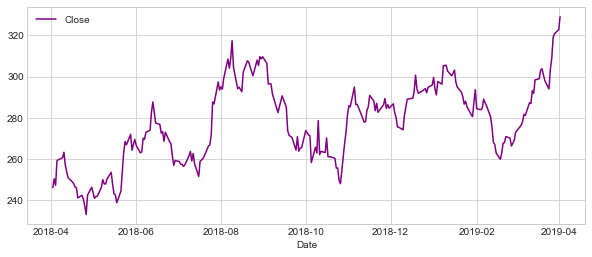

In [10]:
sbi['Close'].plot(legend= True , figsize =(10,4),color='purple')

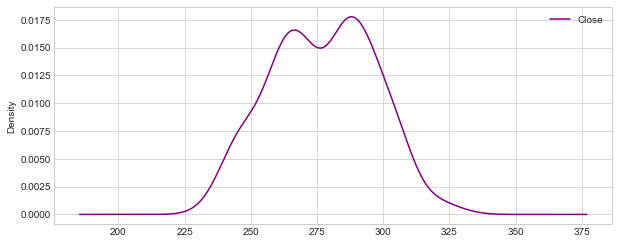

In [11]:
sbi['Close'].plot(legend= True , figsize =(10,4),color='purple',kind='kde')

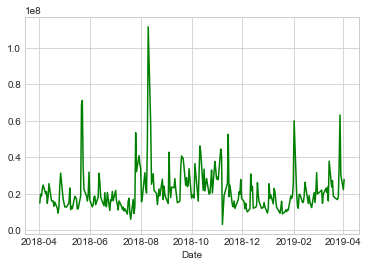

In [12]:
sbi['Volume'].plot(color='green')

In [13]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    sbi[column_name]=pd.rolling_mean(sbi['Prev Close'],ma)  # pandas has a built-in rolling mean calculator

C:\Users\Neel\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\Neel\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\Neel\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


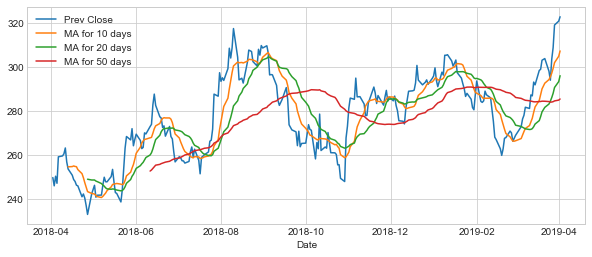

In [14]:
sbi[['Prev Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000108FCBE0>,
      dtype=object)

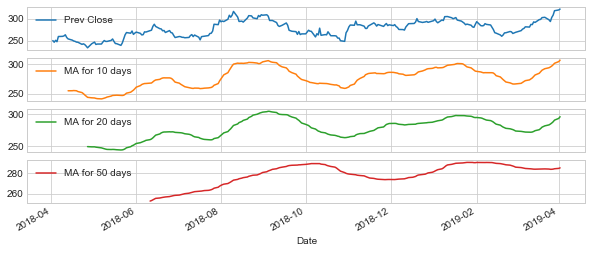

In [15]:
sbi[['Prev Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=True,figsize=(10,4))

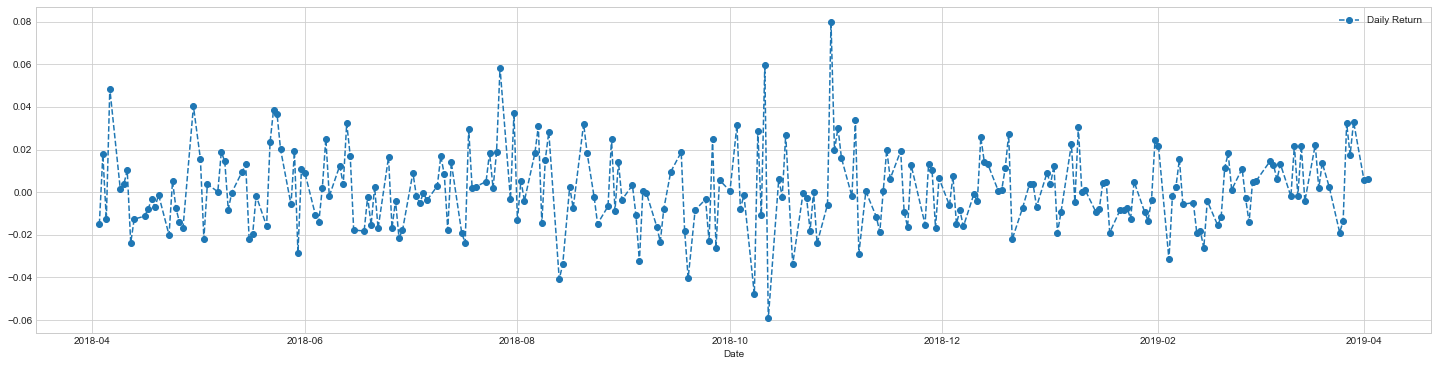

In [16]:
# We'll use pct_change to find the percent change for each day
sbi['Daily Return'] = sbi['Prev Close'].pct_change()

# Then we'll plot the daily return percentage
sbi['Daily Return'].plot(figsize=(25,6),legend=True,linestyle='--',marker='o')

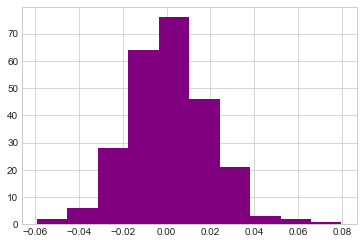

In [17]:
#overall look at the average daily return using a histogr
sbi['Daily Return'].hist(color="purple")

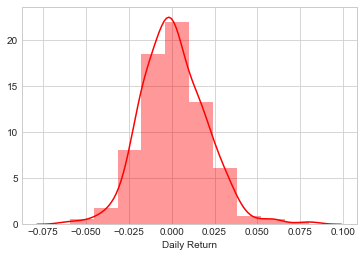

In [18]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
# use seaborn to create both a histogram and kde plot on the same figure.
sns.distplot(sbi['Daily Return'].dropna(),bins=10,color='red')


In [19]:
closing_df=DataFrame()

In [20]:
closing_df['sbi']=sbi['Close']
closing_df['pnb']=pnb['Close']
closing_df['infosys']=infosys['Close']
closing_df['itc']=itc['Close']

In [21]:
closing_df.head()

,sbi,pnb,infosys,itc
Date,,,,
2018-04-02,246.15,96.30,1137.15,258.25
2018-04-03,250.50,95.45,1140.45,258.50
2018-04-04,247.30,94.40,1124.20,258.60
2018-04-05,259.30,97.00,1147.55,259.65
2018-04-06,259.70,102.15,1127.00,260.85


In [22]:

#  del closing_df['sbi']    --->to delete a column

In [23]:
bank_rets = closing_df.pct_change()

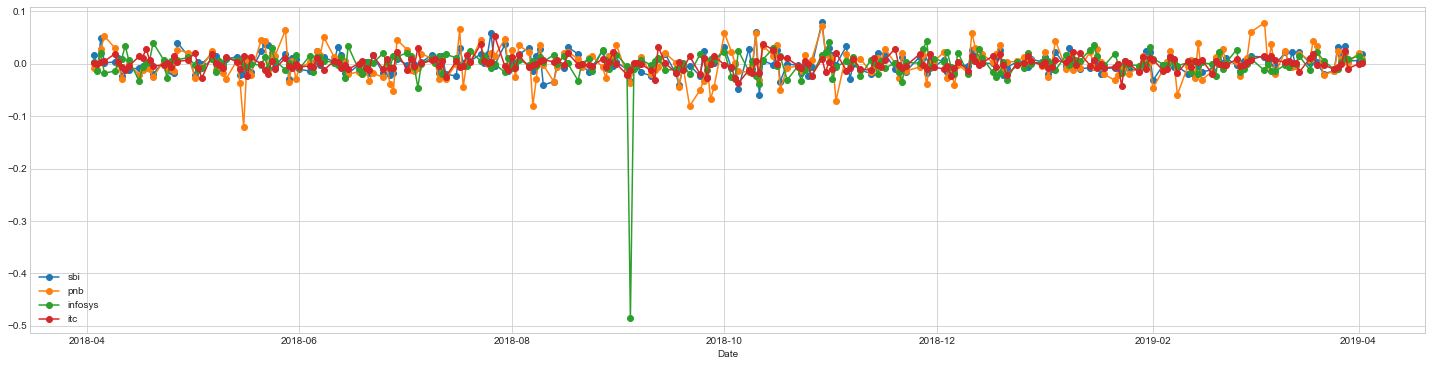

In [24]:
bank_rets.plot(figsize=(25,6),legend=True,marker='o')

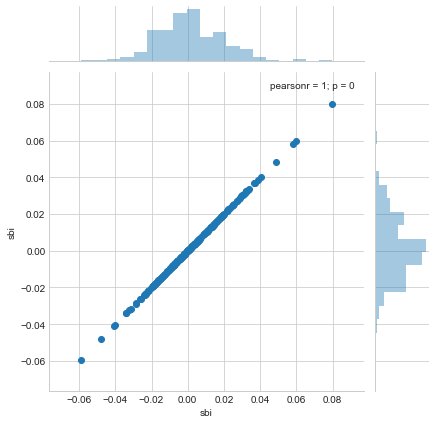

In [25]:
# We'll use joinplot to compare the daily returns 
sns.jointplot('sbi','sbi',bank_rets,kind='scatter')

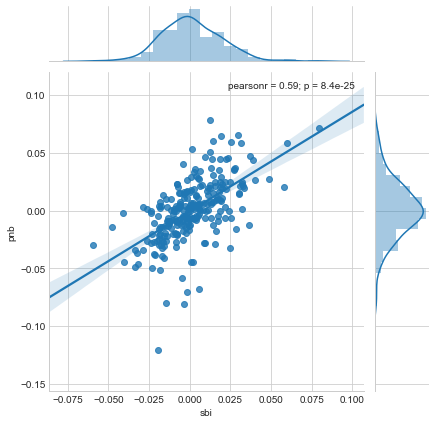

In [26]:
sns.jointplot('sbi','pnb',bank_rets,kind='reg' )

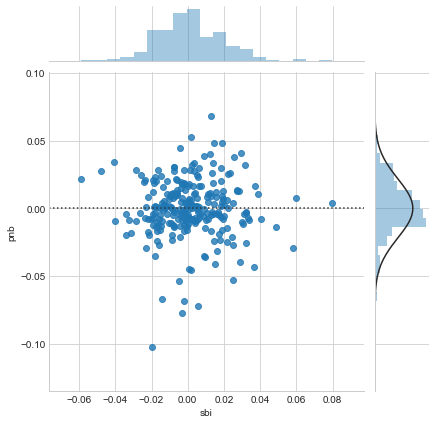

In [27]:
sns.jointplot('sbi','pnb',bank_rets,kind='resid')

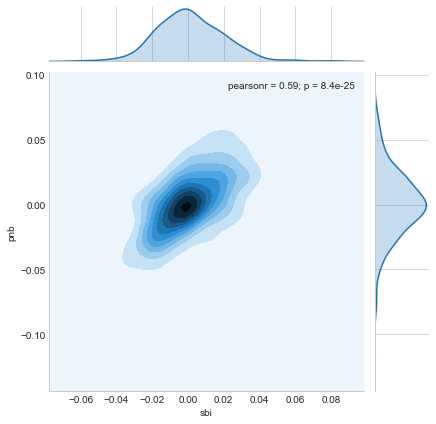

In [28]:
sns.jointplot('sbi','pnb',bank_rets,kind='kde')

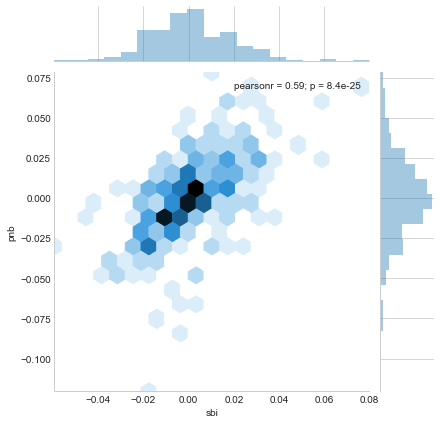

In [29]:
sns.jointplot('sbi','pnb',bank_rets,kind='hex')

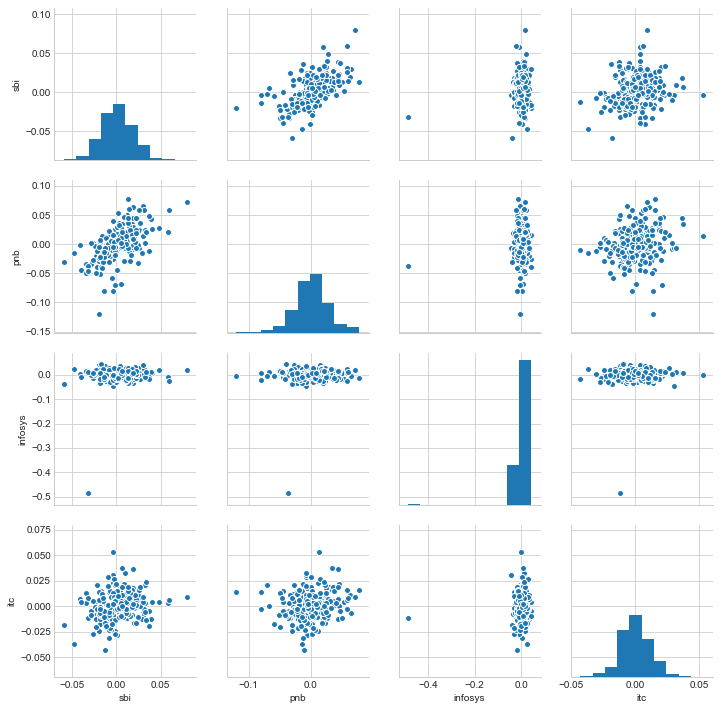

In [30]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the compasns.pairplot(tech_rets.dropna())
sns.pairplot(bank_rets.dropna())

C:\Users\Neel\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


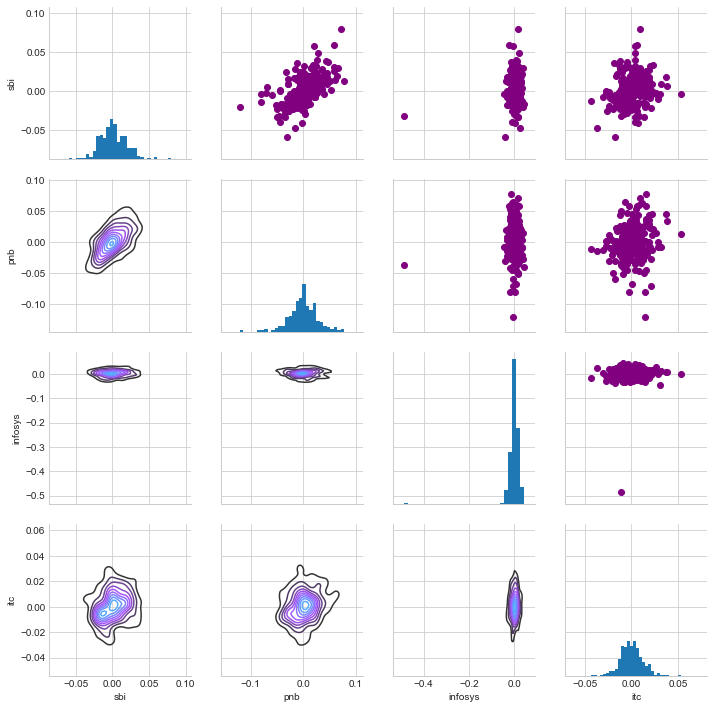

In [31]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(bank_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


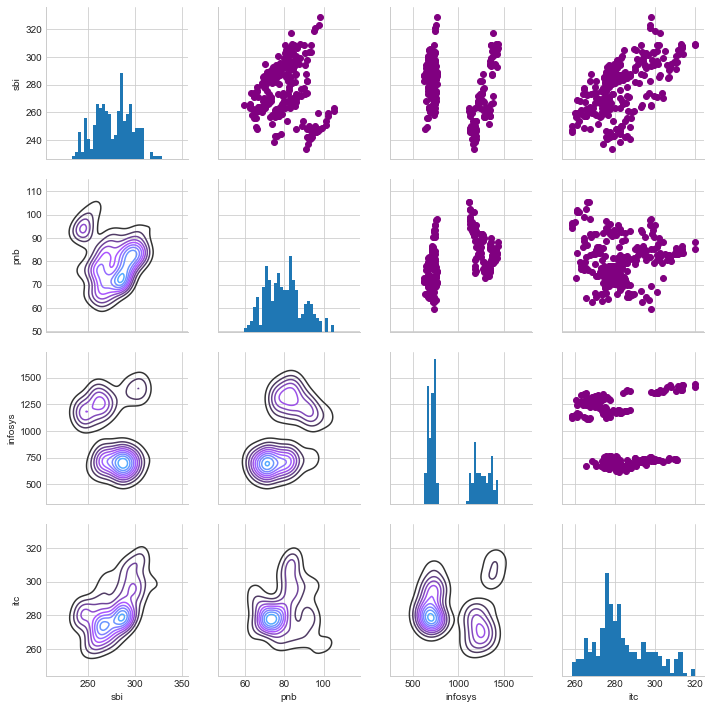

In [32]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

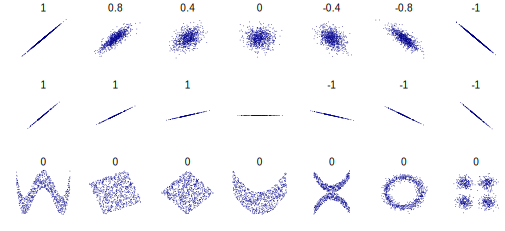

In [33]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

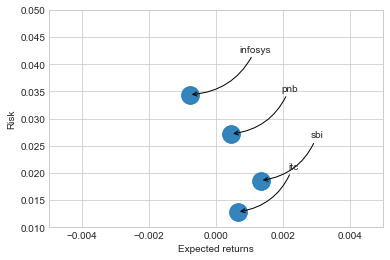

In [34]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = bank_rets.dropna()

area = np.pi*20 #np.pi funcs gives the value of pie , ie = 3.14159

plt.scatter(rets.mean(), rets.std(),alpha = 0.9,s =5*area) #alpha changes the brightness of the dots in the scatter plot
                                                            # area  is the radius of the dots d with the same centre
# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.05])
plt.xlim([-0.005,0.005])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'top',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3',))


In [35]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for sbi
mu = rets.mean()['sbi']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['sbi']

In [36]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,u'Monte Carlo Analysis for SBI')

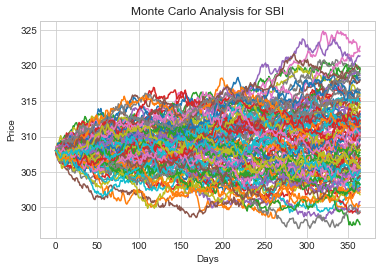

In [37]:
# Get start price from sbi.head()
start_price = 308

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for SBI')

In [38]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

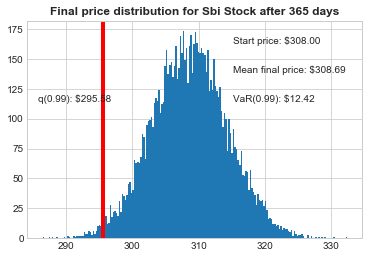

In [39]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Sbi Stock after %s days" % days, weight='bold');

In [40]:
for a in xrange(1,10,-2):
    print a

In [41]:
for a in range(1,10,2):
    print a

1
3
5
7
9
